In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
plt.style.use('seaborn-whitegrid')

In [2]:
train = pd.read_csv('./data/train.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)
test = pd.read_csv('./data/test.csv')

In [30]:
train.shape

(13730, 166)

In [31]:
test.shape

(4576, 47)

In [6]:
extra_cols=set(train.columns) - set(test.columns)

In [3]:
train = train[test.columns].join(train['NU_NOTA_MT'])
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN


In [4]:
train = train.set_index('NU_INSCRICAO')
test = test.set_index('NU_INSCRICAO')

In [96]:
train.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,...,520.0,D,D,C,A,A,C,H,A,399.4
2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,NaN,A,459.8
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,...,NaN,H,E,E,C,B,C,F,D,NaN
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,...,NaN,E,D,C,A,A,B,F,A,NaN


In [5]:
sns.set_context("paper",font_scale=1.2 ,rc={"axes.titlesize":17,"axes.labelsize":15}) 

In [6]:
#Substituir os nulos de NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_CH e NU_NOTA_MT por 0 pq esses foram os eliminados e faltantes.
train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC']]=train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC']].fillna(value=0)

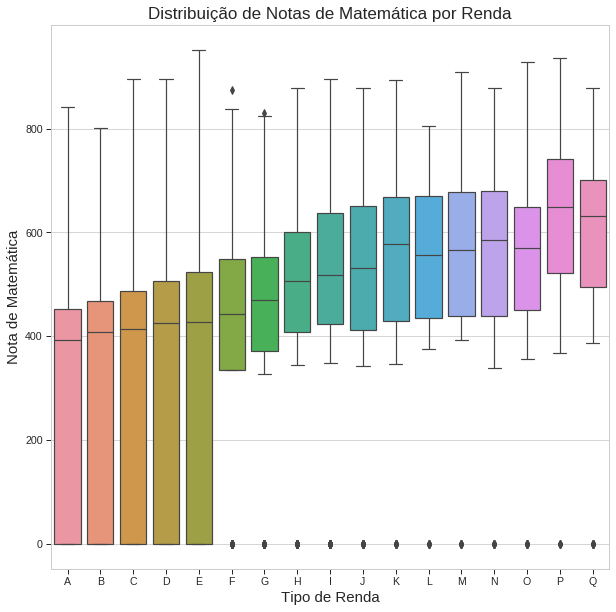

In [39]:
 # A => Nenhuma renda.
# B => Até R$ 880,00.
# C => De R$ 880,01 até R$ 1.320,00.
# D => De R$ 1.320,01 até R$ 1.760,00.
# E => De R$ 1.760,01 até R$ 2.200,00.
# F => De R$ 2.200,01 até R$ 2.640,00.
# G => De R$ 2.640,01 até R$ 3.520,00.
# H => De R$ 3.520,01 até R$ 4.400,00.
# I => De R$ 4.400,01 até R$ 5.280,00.
# J => De R$ 5.280,01 até R$ 6.160,00.
# K => De R$ 6.160,01 até R$ 7.040,00.
# L => De R$ 7.040,01 até R$ 7.920,00.
# M => De R$ 7.920,01 até R$ 8.800,00.
# N => De R$ 8.800,01 até R$ 10.560,00.
# O => De R$ 10.560,01 até R$ 13.200,00.
# P => De R$ 13.200,01 até R$ 17.600,00.
# Q => Mais de R$ 17.600,00.

plt.figure(figsize=(10,10))
sns.boxplot(data=train,x='Q006',y='NU_NOTA_MT',order=sorted(train['Q006'].unique())).set(xlabel='Tipo de Renda',ylabel='Nota de Matemática',title='Distribuição de Notas de Matemática por Renda')
plt.show()

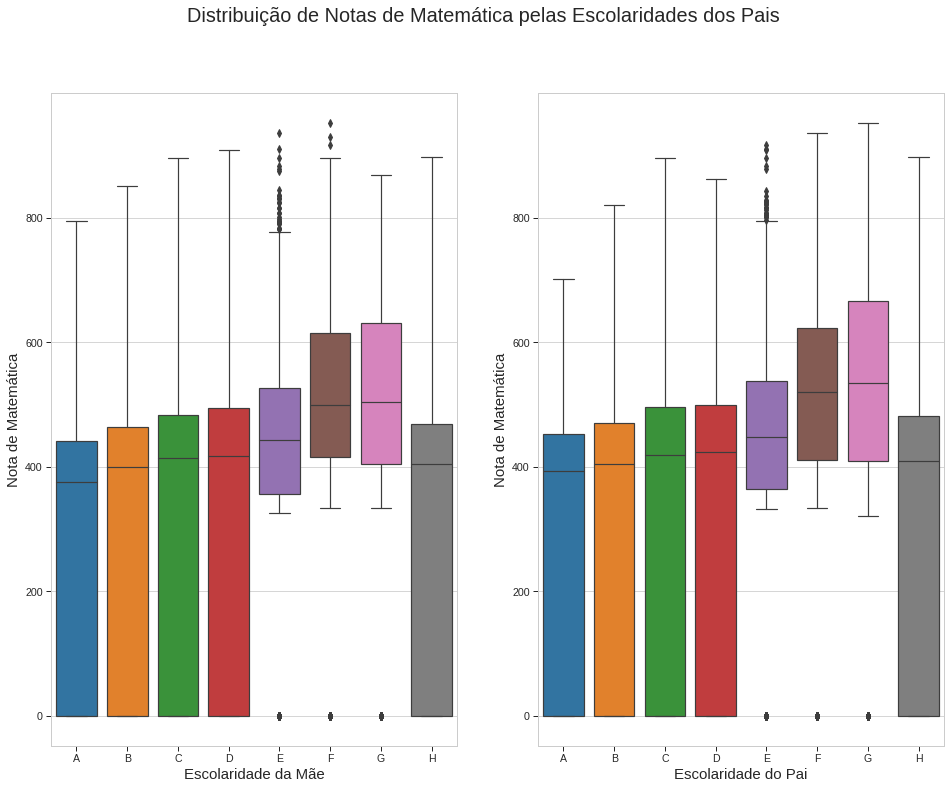

In [37]:
# A => Nunca estudou.
# B => Não completou a 4ª série/5º ano do Ensino Fundamental.
# C => Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
# D => Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
# E => Completou o Ensino Médio, mas não completou a Faculdade.
# F => Completou a Faculdade, mas não completou a Pós-graduação.
# G => Completou a Pós-graduação.
# H => Não sei.

fig, axes = plt.subplots(1, 2, figsize=(16, 12))
fig.suptitle('Distribuição de Notas de Matemática pelas Escolaridades dos Pais',size='xx-large')
sns.boxplot(data=train,x='Q002',y='NU_NOTA_MT',order=sorted(train['Q002'].unique()),ax=axes[0]).set(xlabel='Escolaridade da Mãe',ylabel='Nota de Matemática')
sns.boxplot(data=train,x='Q001',y='NU_NOTA_MT',order=sorted(train['Q001'].unique()),ax=axes[1]).set(xlabel='Escolaridade do Pai',ylabel='Nota de Matemática')
plt.show()

Inglês      386.913587
Espanhol    334.997007
Name: NU_NOTA_MT, dtype: float64


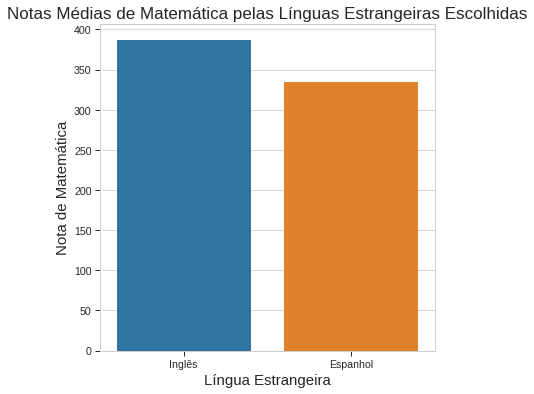

In [40]:
plt.figure(figsize=(6,6))
plt.title('Notas Médias de Matemática pelas Línguas Estrangeiras Escolhidas')
grupo = train.groupby(['TP_LINGUA']).mean()
grupo.index = ['Inglês','Espanhol']
print(grupo['NU_NOTA_MT'])
sns.barplot(x=grupo['NU_NOTA_MT'].index,y=grupo['NU_NOTA_MT']).set(xlabel='Língua Estrangeira',ylabel='Nota de Matemática')
plt.show()

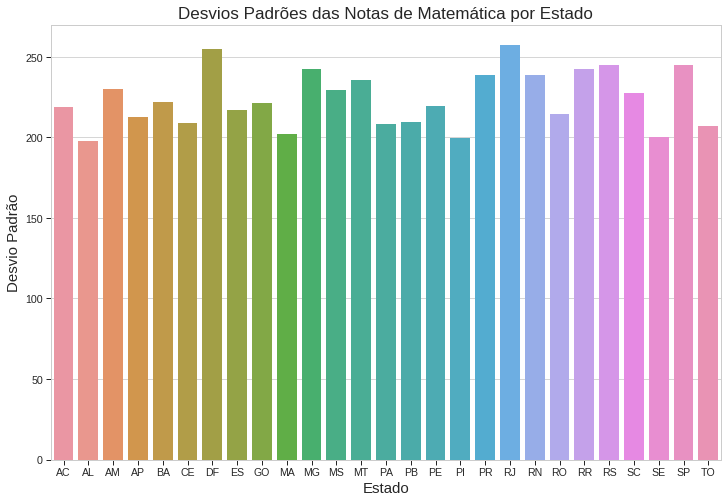

In [41]:
grupo = train.groupby(['SG_UF_RESIDENCIA']).std()

plt.figure(figsize=(12,8))
plt.title('Desvios Padrões das Notas de Matemática por Estado')
sns.barplot(x=grupo['NU_NOTA_MT'].index,y=grupo['NU_NOTA_MT']).set(xlabel='Estado',ylabel='Desvio Padrão')
plt.show()

In [7]:
def regiao(estado):
    norte = ['AC','AM','RR','RO','AP','PA','TO']
    nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
    centro = ['GO','DF','MT','MS']
    sudeste = ['MG','SP','RJ','ES']
    
    if estado in norte: return 'Norte'
    elif estado in nordeste: return 'Nordeste'
    elif estado in centro: return 'Centro-Oeste'
    elif estado in sudeste: return 'Sudeste'
    else: return 'Sul'

In [8]:
train['Região'] = train['SG_UF_RESIDENCIA'].map(lambda x:regiao(x))

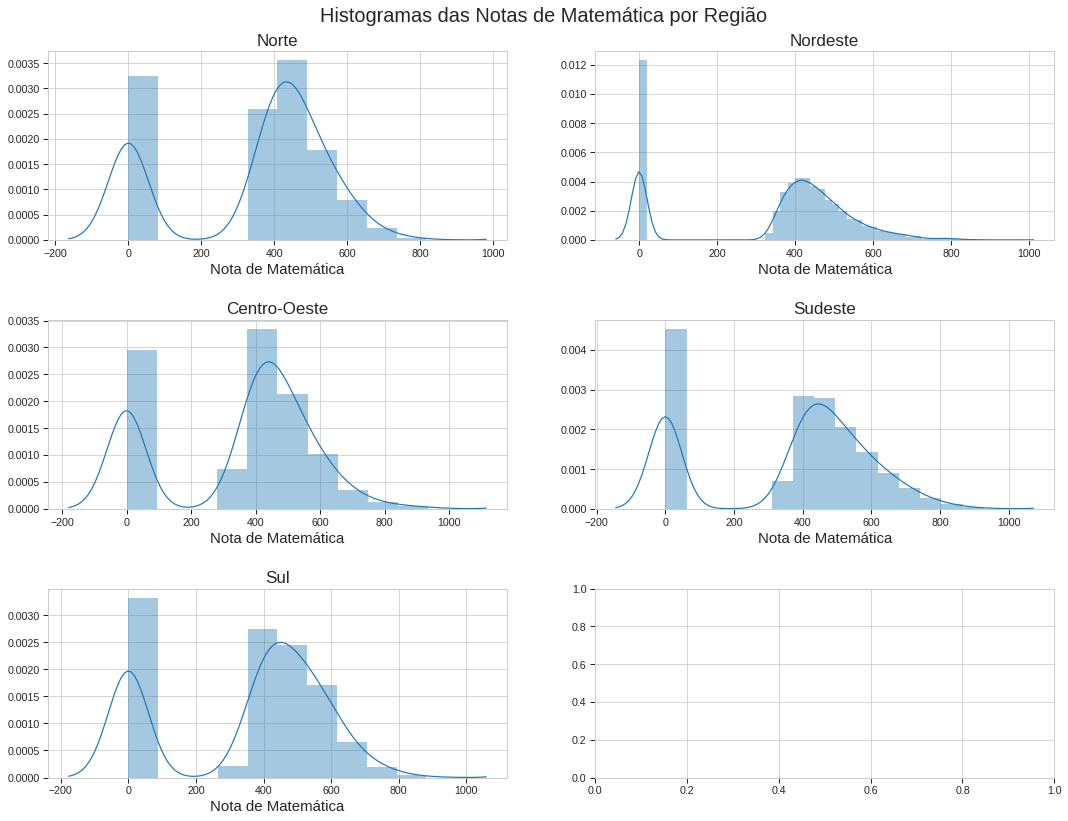

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Histogramas das Notas de Matemática por Região',size='xx-large')

fig.tight_layout(pad=5)
sns.distplot(train[train['Região'] == 'Norte']['NU_NOTA_MT'],ax=axes[0,0]).set(title='Norte',xlabel='Nota de Matemática')
sns.distplot(train[train['Região'] == 'Nordeste']['NU_NOTA_MT'],ax=axes[0,1]).set(title='Nordeste',xlabel='Nota de Matemática')
sns.distplot(train[train['Região'] == 'Centro-Oeste']['NU_NOTA_MT'],ax=axes[1,0]).set(title='Centro-Oeste',xlabel='Nota de Matemática')
sns.distplot(train[train['Região'] == 'Sudeste']['NU_NOTA_MT'],ax=axes[1,1]).set(title='Sudeste',xlabel='Nota de Matemática')
sns.distplot(train[train['Região'] == 'Sul']['NU_NOTA_MT'],ax=axes[2,0]).set(title='Sul',xlabel='Nota de Matemática')

plt.show()

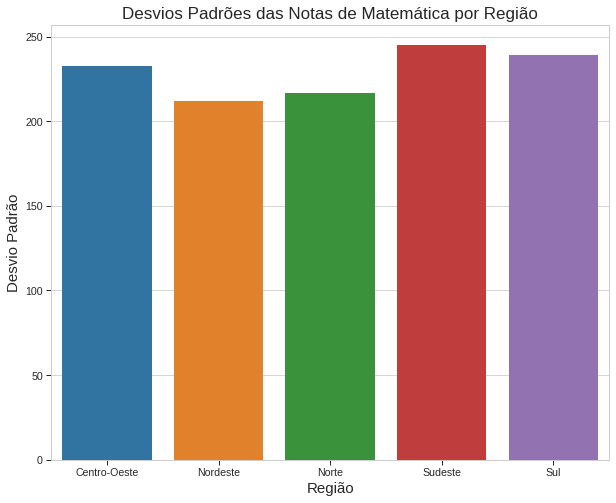

In [45]:
grupo = train.groupby(['Região']).std()

plt.figure(figsize=(10,8))
plt.title('Desvios Padrões das Notas de Matemática por Região')
sns.barplot(x=grupo['NU_NOTA_MT'].index,y=grupo['NU_NOTA_MT']).set(xlabel='Região',ylabel='Desvio Padrão')
plt.show()

In [18]:
train[train.isnull().any(axis=1)][['NU_NOTA_MT','NU_NOTA_LC']].head(30)

,NU_NOTA_MT,NU_NOTA_LC
NU_INSCRICAO,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,399.4,581.2
2c3acac4b33ec2b195d77e7c04a2d75727fad723,459.8,599.0
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN
a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,364.5,410.9
2eb189d4912f64b19d1967e8e84b6141aba18770,566.7,611.2
5822cb43e0800429be2084b3f86a63aaa73fa66c,372.4,521.8
94f7e277f87cd58e10a45da4ad5dd168651cf3ef,NaN,NaN


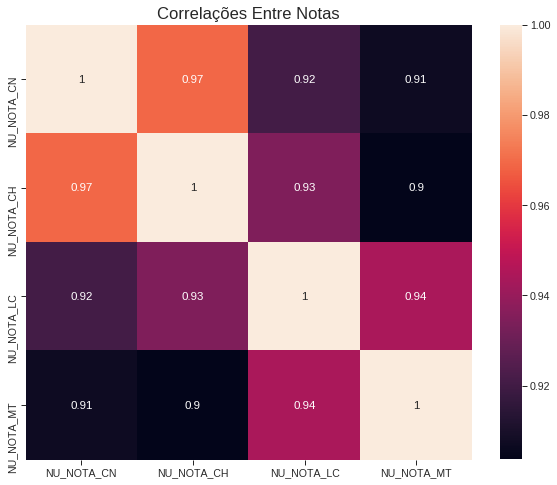

In [9]:
notas_corr = train[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']].corr()
plt.figure(figsize=(10,8))
plt.title('Correlações Entre Notas',size='x-large')
sns.heatmap(notas_corr,annot=True)

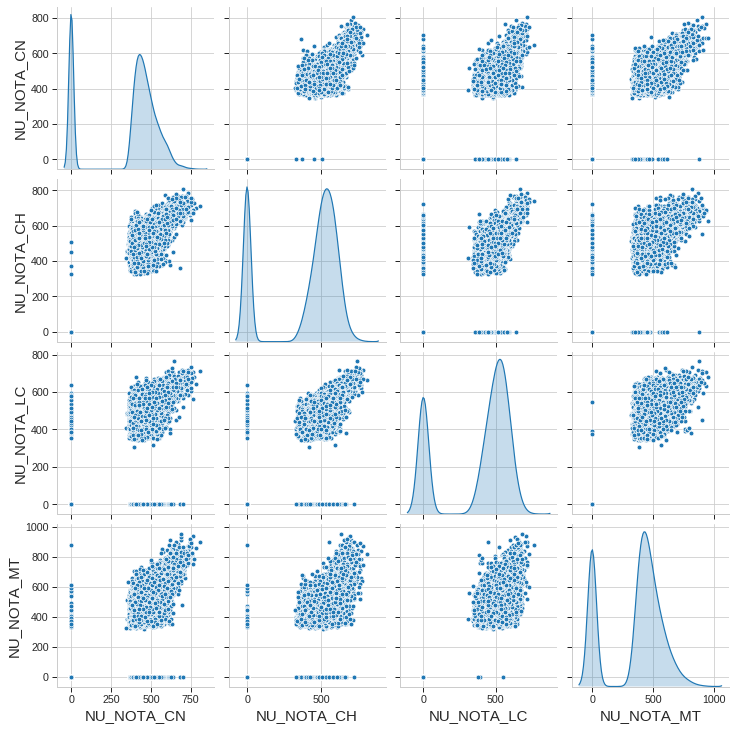

In [47]:
sns.pairplot(train[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']],diag_kind='kde')
plt.show()

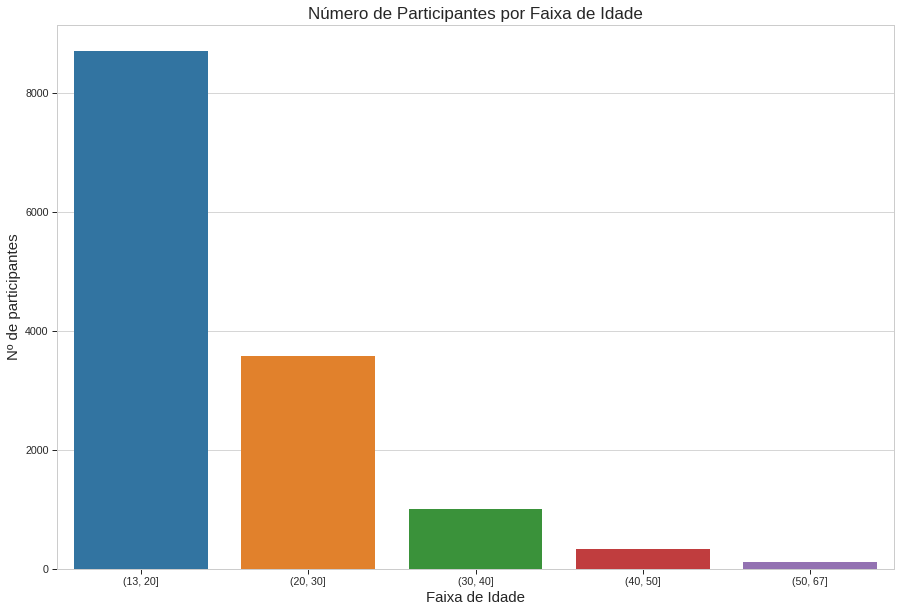

In [48]:
train['faixa_idade'] = pd.cut(train['NU_IDADE'],bins=[train['NU_IDADE'].min(),20,30,40,50,train['NU_IDADE'].max()])

grupo = train.groupby(['faixa_idade']).count()

plt.figure(figsize=(15,10))
plt.title('Número de Participantes por Faixa de Idade')
sns.barplot(x=grupo['NU_NOTA_MT'].index,y=grupo['NU_NOTA_MT']).set(xlabel='Faixa de Idade',ylabel='Nº de participantes')
plt.show()

In [10]:
#0 são nulos de: ['TP_COR_RACA']
rep_dic_0 = {1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena',0:np.nan}
train['TP_COR_RACA'] = train['TP_COR_RACA'].replace(rep_dic_0)

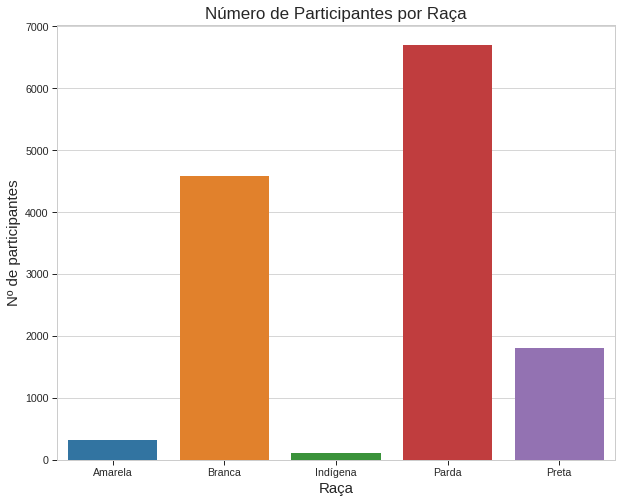

In [50]:
grupo = train.groupby(['TP_COR_RACA']).count()

plt.figure(figsize=(10,8))
plt.title('Número de Participantes por Raça')
sns.barplot(x=grupo['NU_NOTA_MT'].index,y=grupo['NU_NOTA_MT']).set(xlabel='Raça',ylabel='Nº de participantes')
plt.show()

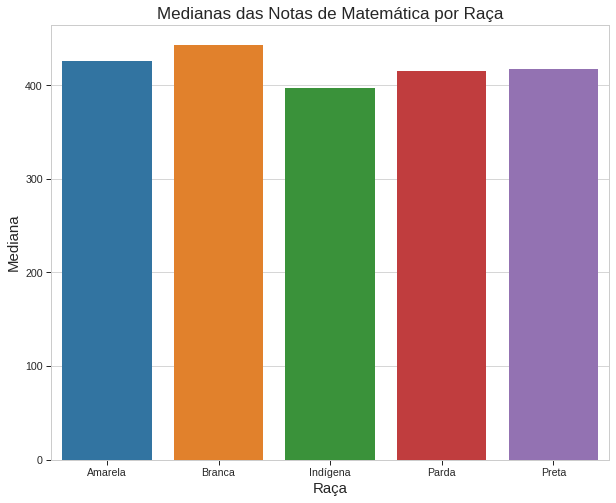

In [51]:
grupo = train.groupby(['TP_COR_RACA']).median()

plt.figure(figsize=(10,8))
plt.title('Medianas das Notas de Matemática por Raça')
sns.barplot(x=grupo['NU_NOTA_MT'].index,y=grupo['NU_NOTA_MT']).set(xlabel='Raça',ylabel='Mediana')
plt.show()

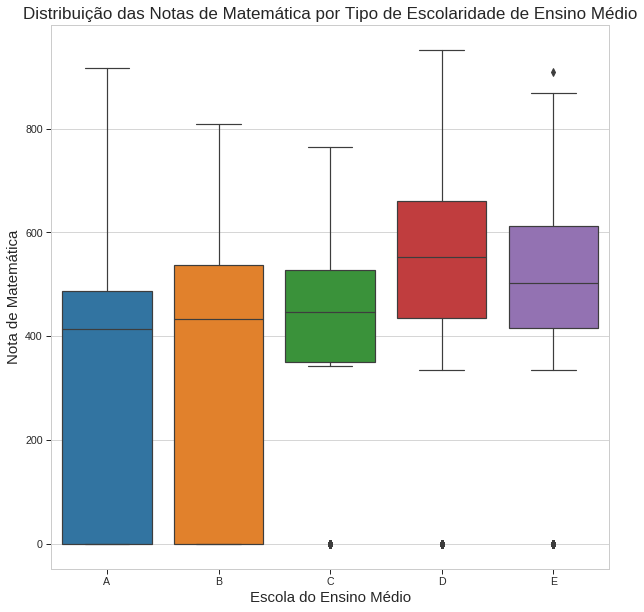

In [52]:
#box-plot regioes
# A => Somente em escola pública.
# B => Parte em escola pública e parte em escola privada sem bolsa de estudo integral.
# C => Parte em escola pública e parte em escola privada com bolsa de estudo integral.
# D => Somente em escola privada sem bolsa de estudo integral.
# E => Somente em escola privada com bolsa de estudo integral.

plt.figure(figsize=(10,10))
sns.boxplot(data=train,x='Q047',y='NU_NOTA_MT',order=sorted(train['Q047'].unique())).set(title='Distribuição das Notas de Matemática por Tipo de Escolaridade de Ensino Médio',xlabel='Escola do Ensino Médio',ylabel='Nota de Matemática')

plt.show()

In [53]:
train['Q047'].value_counts()

A    11726
D     1173
B      348
E      321
C      162
Name: Q047, dtype: int64

In [13]:
#Acesso à Internet
train['Q025'] = train['Q025'].replace({'A': 'Não', 'B':'Sim'})
train['Q025'].value_counts()


Sim    7815
Não    5915
Name: Q025, dtype: int64

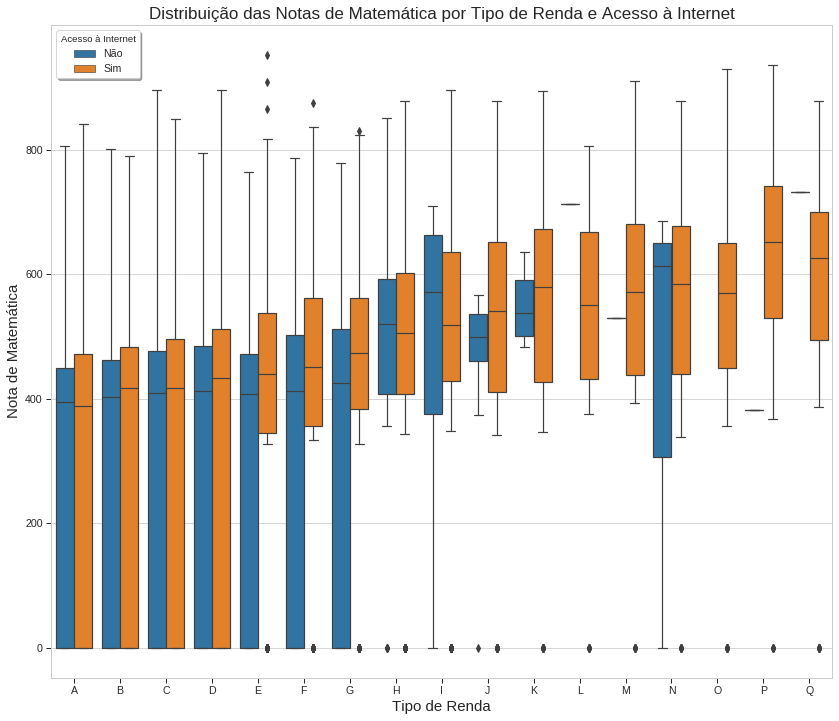

In [15]:
# A => Nenhuma renda.
# B => Até R$ 880,00.
# C => De R$ 880,01 até R$ 1.320,00.
# D => De R$ 1.320,01 até R$ 1.760,00.
# E => De R$ 1.760,01 até R$ 2.200,00.
# F => De R$ 2.200,01 até R$ 2.640,00.
# G => De R$ 2.640,01 até R$ 3.520,00.
# H => De R$ 3.520,01 até R$ 4.400,00.
# I => De R$ 4.400,01 até R$ 5.280,00.
# J => De R$ 5.280,01 até R$ 6.160,00.
# K => De R$ 6.160,01 até R$ 7.040,00.
# L => De R$ 7.040,01 até R$ 7.920,00.
# M => De R$ 7.920,01 até R$ 8.800,00.
# N => De R$ 8.800,01 até R$ 10.560,00.
# O => De R$ 10.560,01 até R$ 13.200,00.
# P => De R$ 13.200,01 até R$ 17.600,00.
# Q => Mais de R$ 17.600,00.

plt.figure(figsize=(14,12))
sns.boxplot(data=train,x='Q006',y='NU_NOTA_MT',hue='Q025',order=sorted(train['Q006'].unique())).set(title='Distribuição das Notas de Matemática por Tipo de Renda e Acesso à Internet',ylabel='Nota de Matemática',xlabel='Tipo de Renda')
plt.legend(title='Acesso à Internet',frameon=True,fancybox=True,shadow=True,loc='upper left')
#plt.savefig('fig.png')
plt.show()

In [60]:
train['TP_SEXO'].value_counts()


F    8491
M    5239
Name: TP_SEXO, dtype: int64

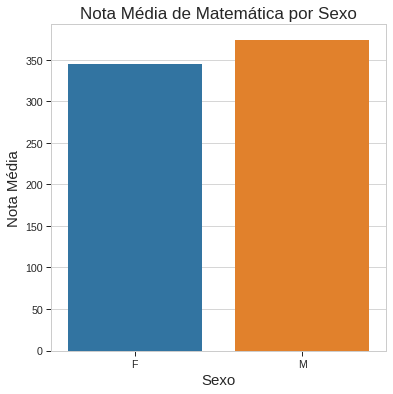

In [61]:
grupo = train.groupby(['TP_SEXO']).mean()
plt.figure(figsize=(6,6))
sns.barplot(x=grupo['NU_NOTA_MT'].index,y=grupo['NU_NOTA_MT']).set(title='Nota Média de Matemática por Sexo',xlabel='Sexo',ylabel='Nota Média')
plt.show()